In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('/Users/peter/Downloads/Machine_Learning/train.csv', header = 0)

In [44]:
train1 = pd.read_csv('/Users/peter/Downloads/Machine_Learning/train.csv', header = 0)

In [4]:
test = pd.read_csv('/Users/peter/Downloads/Machine_Learning/test.csv', header = 0)

In [5]:
train.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [6]:
test.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


In [7]:
train.shape

(1460, 81)

In [8]:
#pd.set_option('display.max_rows', None)
#train.dtypes

### Check data distribution 

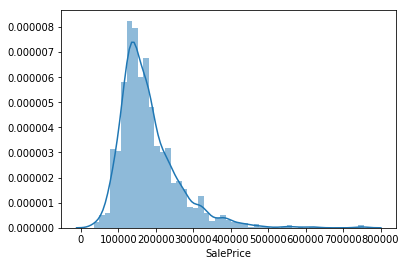

In [9]:
sns.distplot(train['SalePrice'], kde = True, hist_kws={'alpha': 0.5})

### Categorical feature versus saleprice

In [10]:
list_obj = list(train.loc[:, (train.dtypes != 'float64') & (train.dtypes != 'int64')])

In [11]:
list_num = list(train.loc[:, (train.dtypes == 'float64') | (train.dtypes == 'int64')])

In [12]:
# category_num = list(train.select_dtypes(include = ['float64', 'int64']).columns.values)

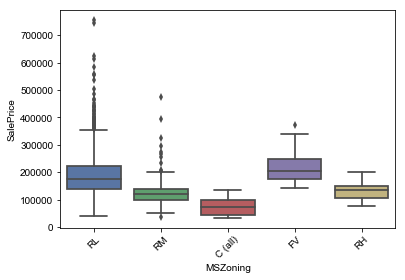

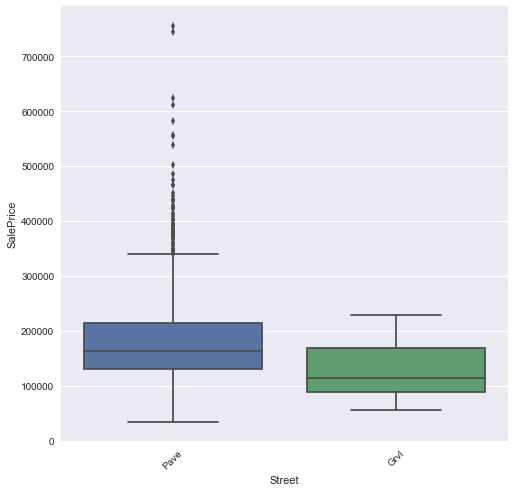

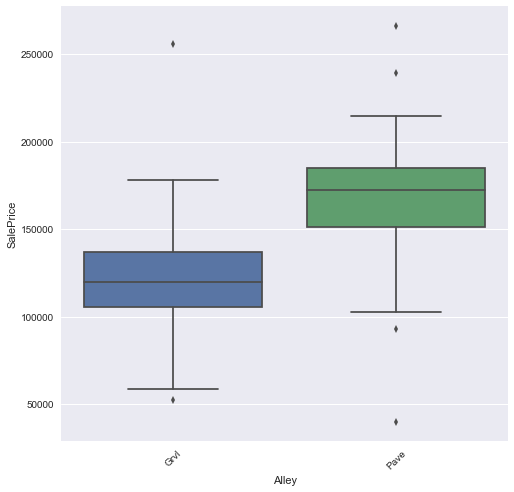

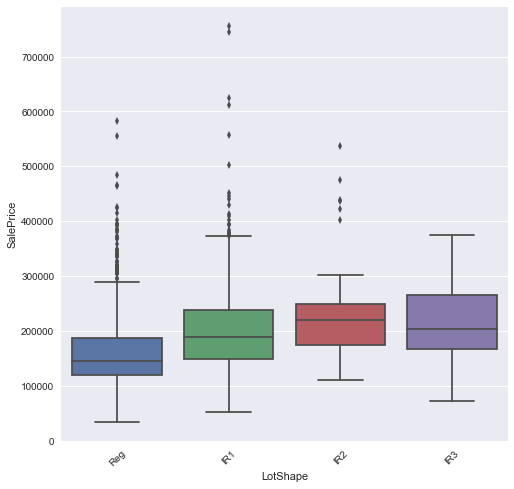

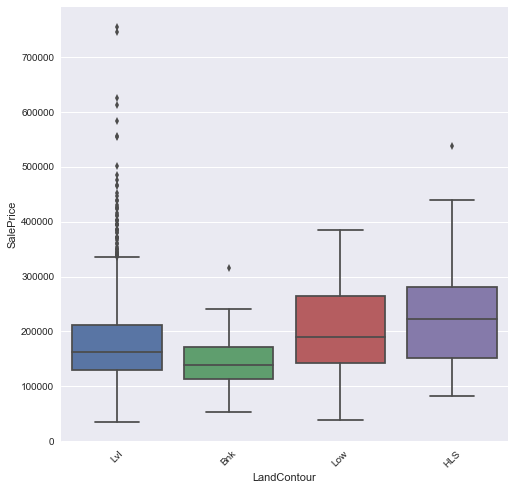

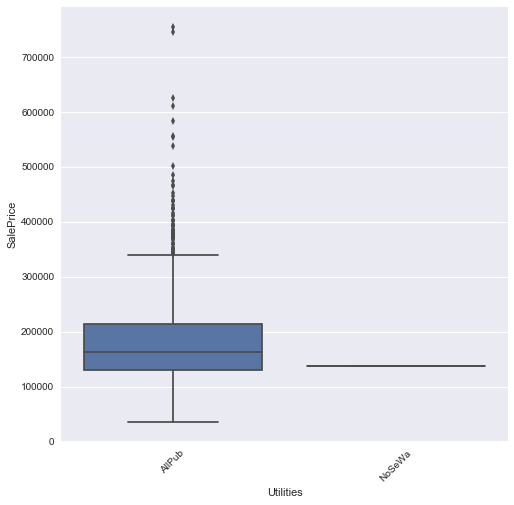

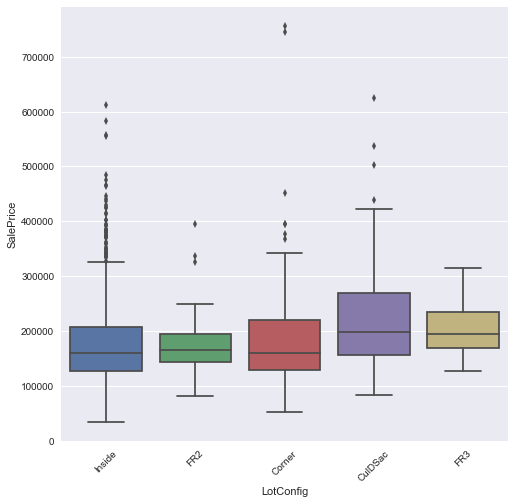

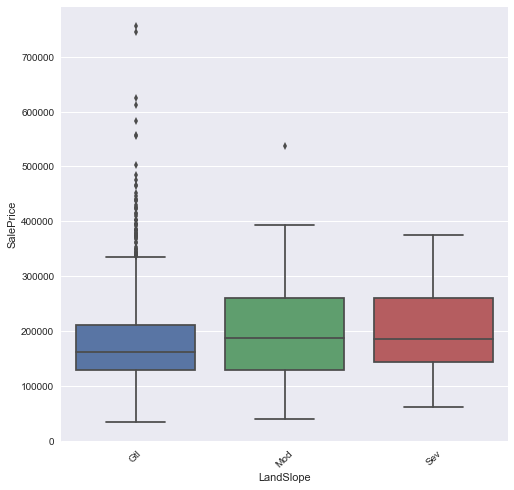

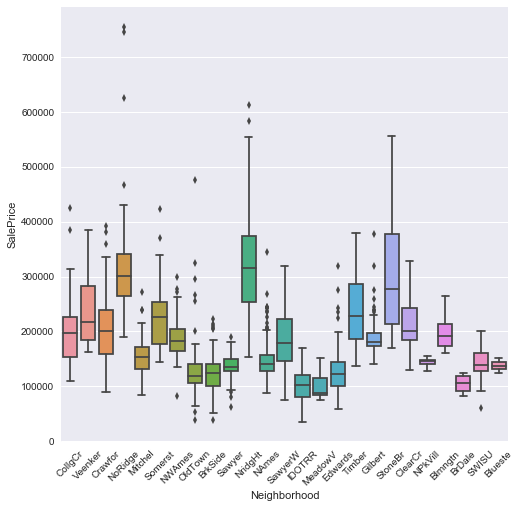

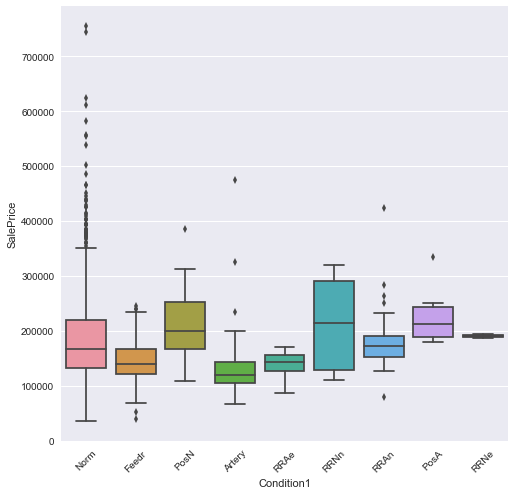

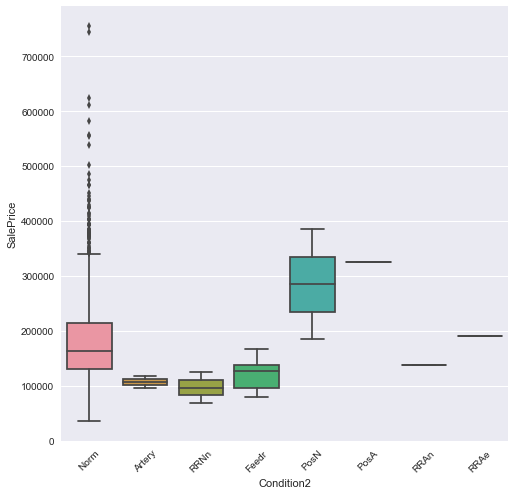

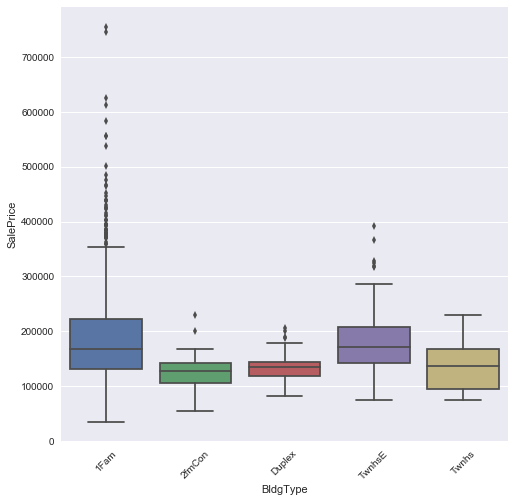

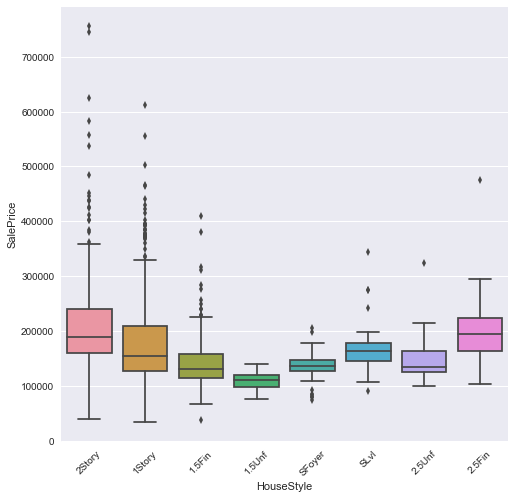

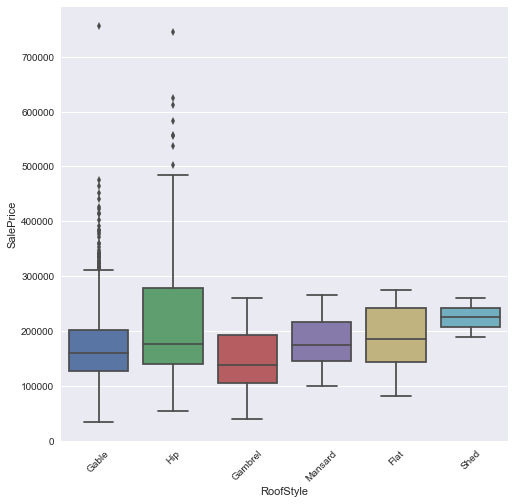

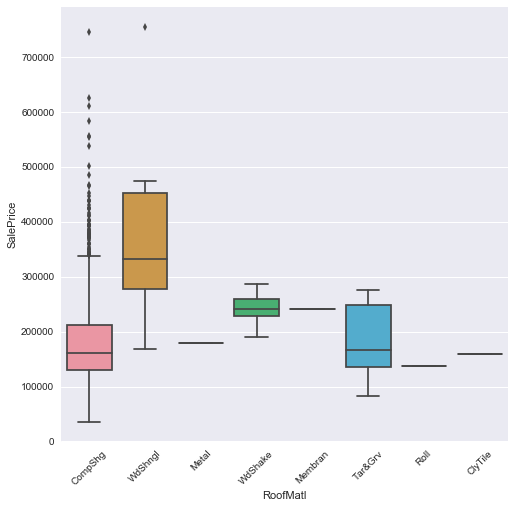

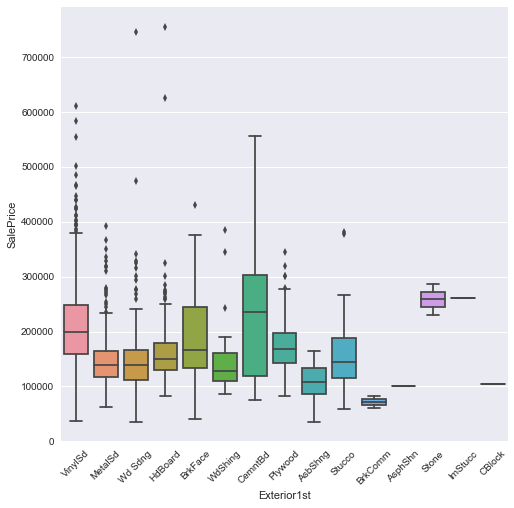

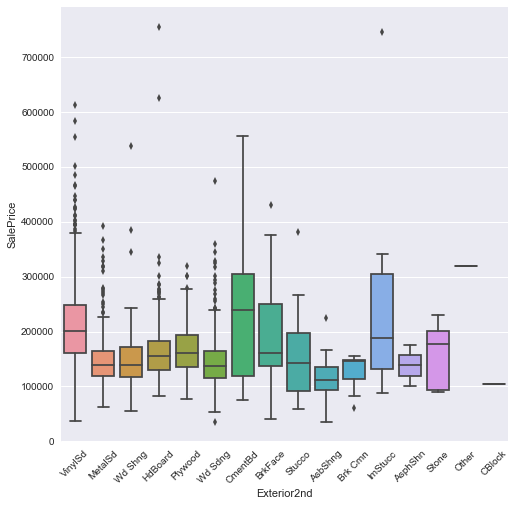

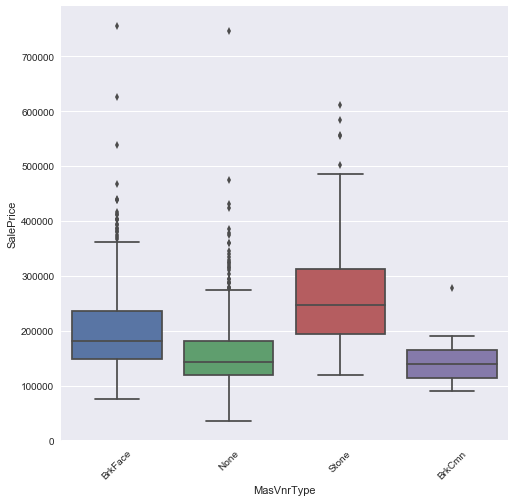

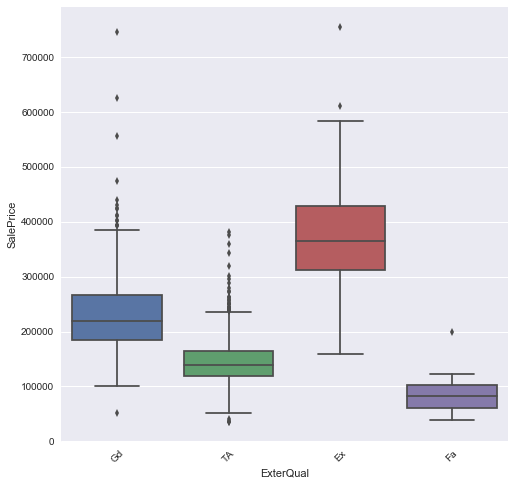

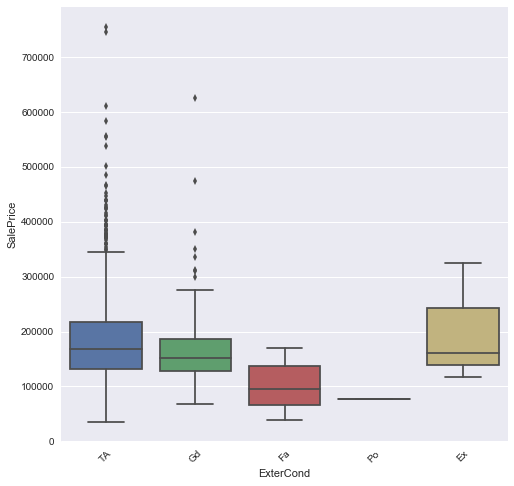

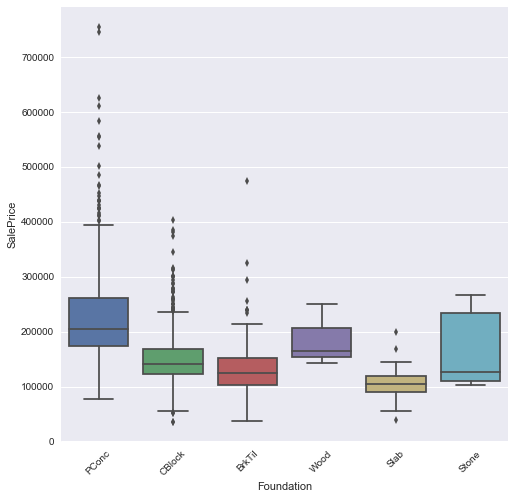

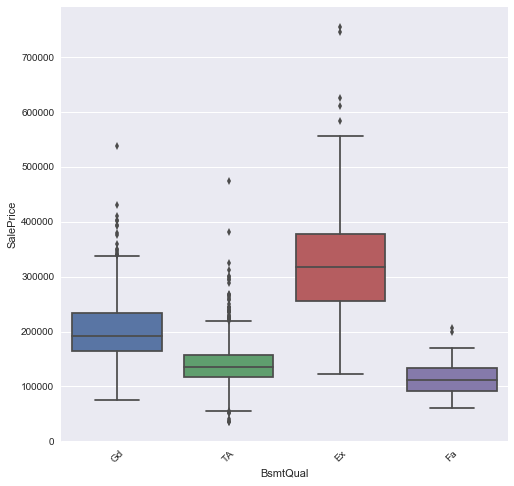

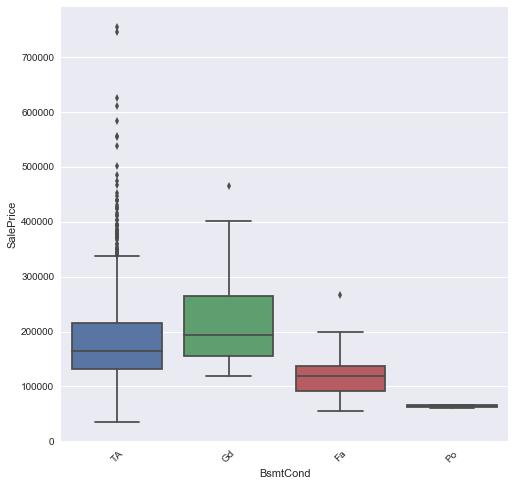

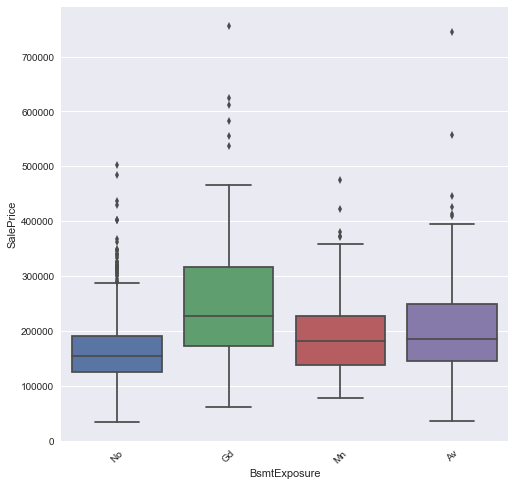

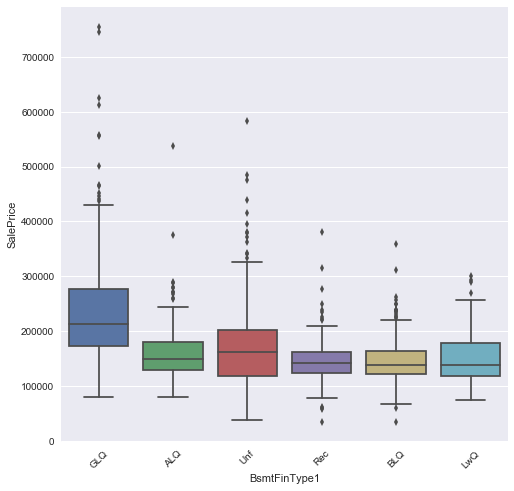

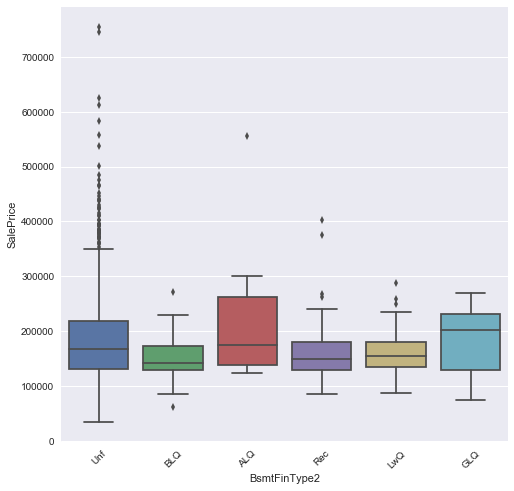

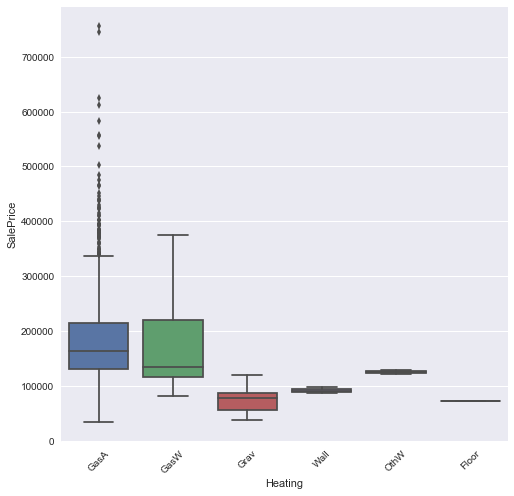

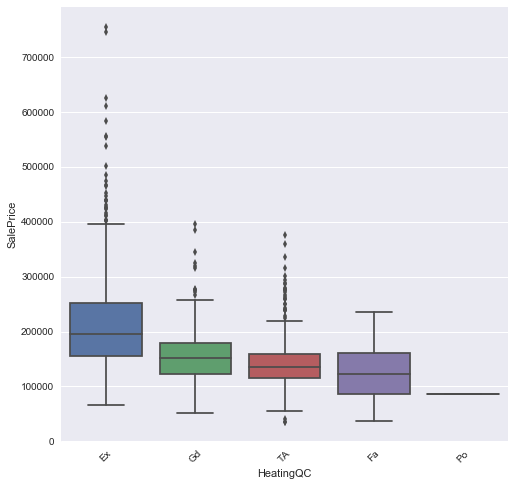

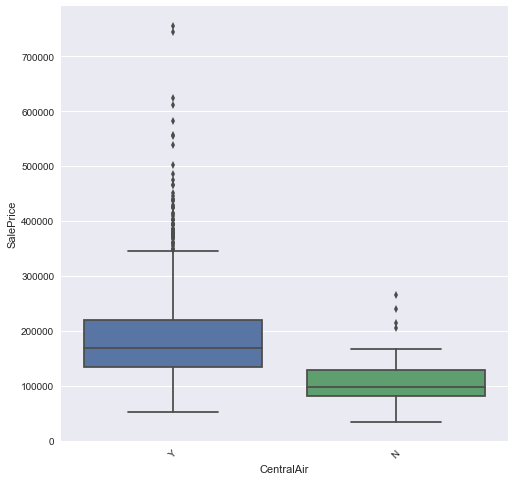

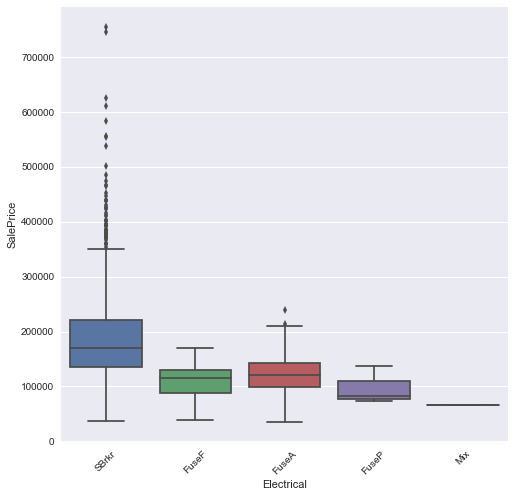

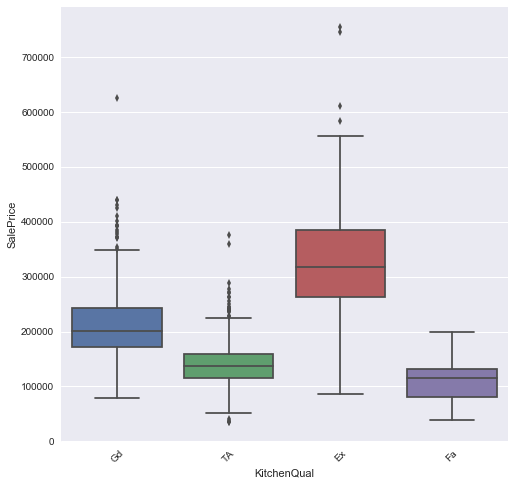

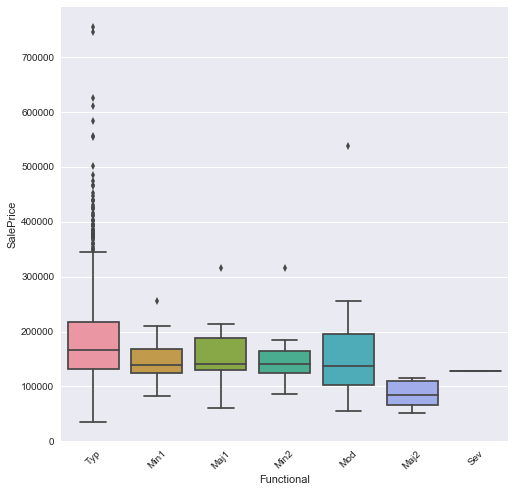

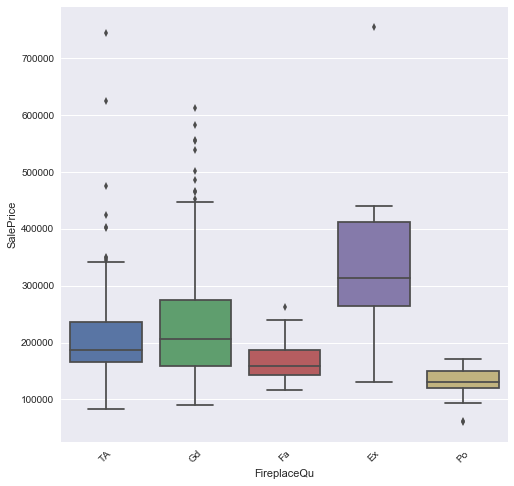

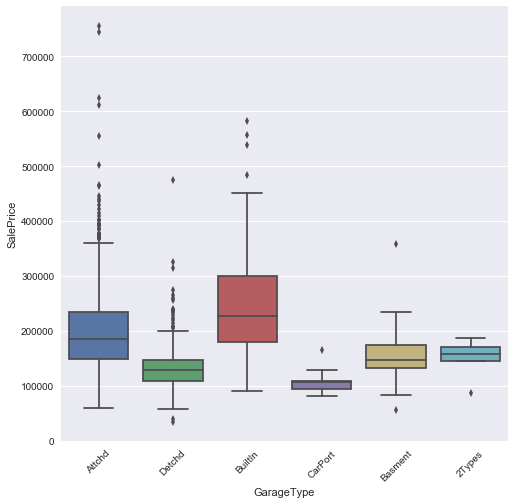

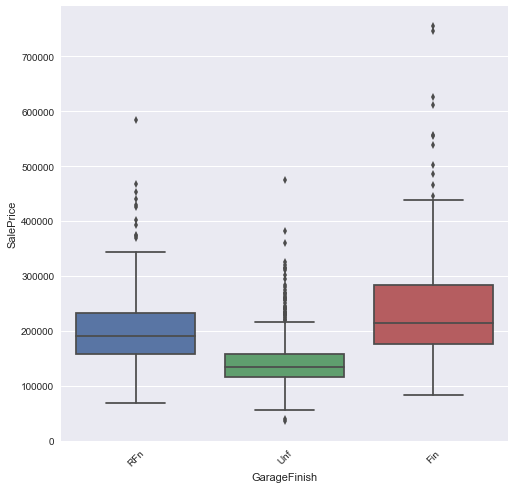

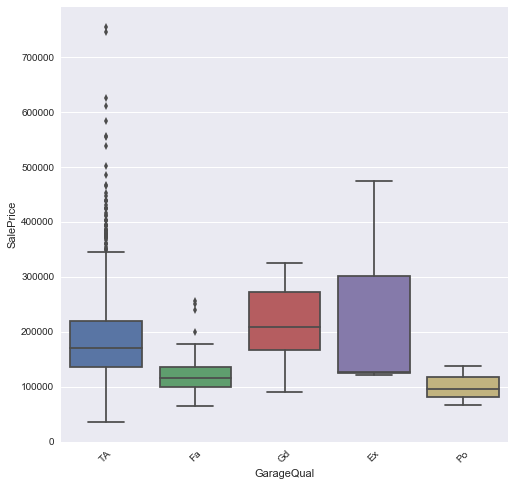

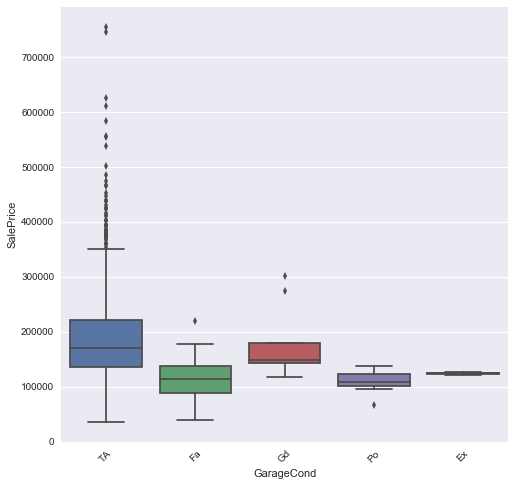

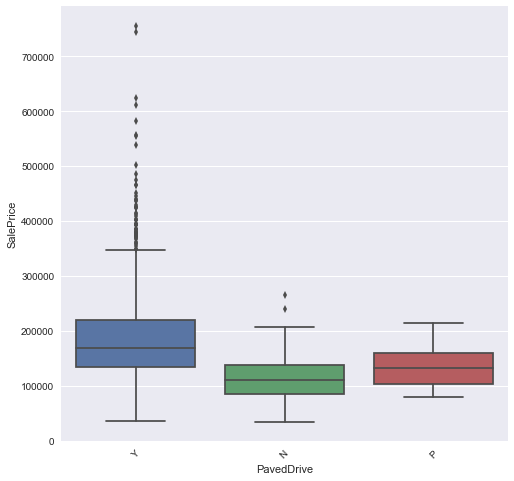

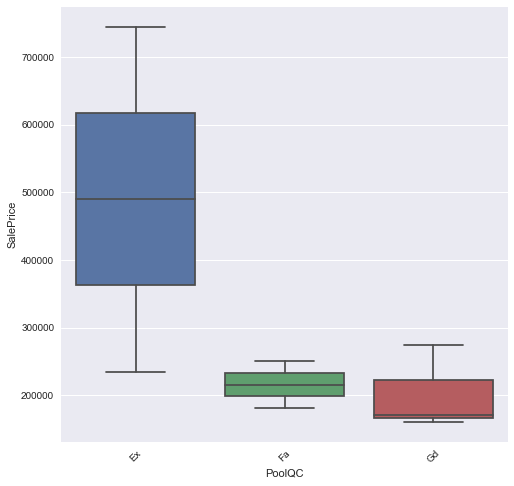

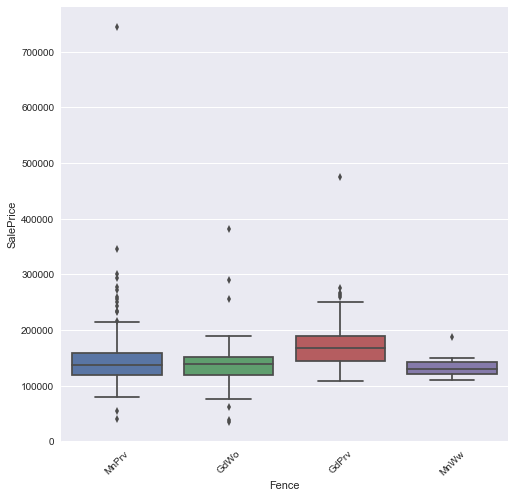

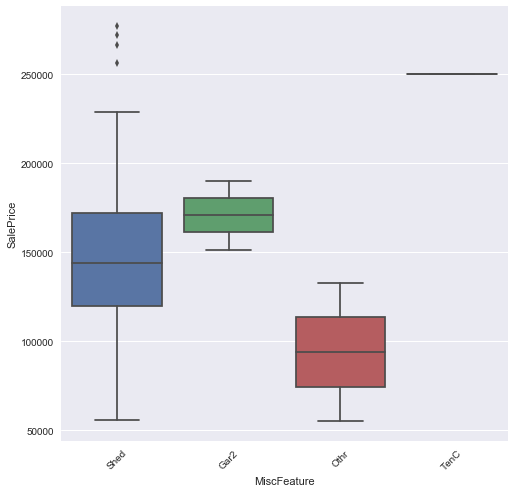

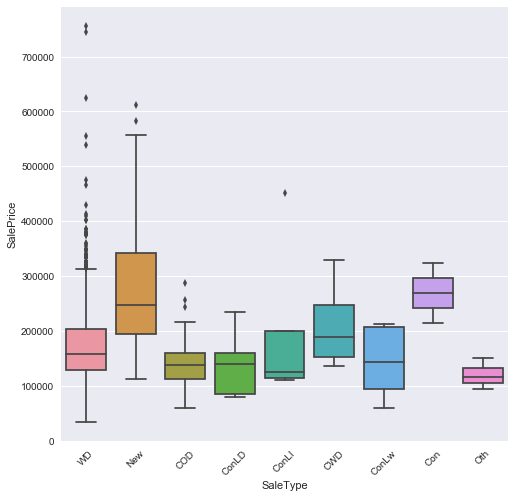

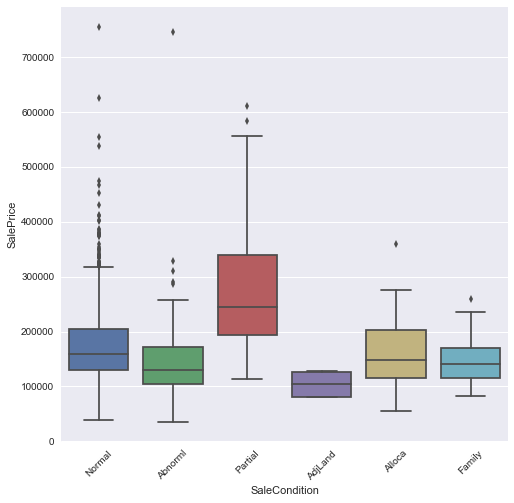

In [13]:
list(train)
pd.set_option('display.max_rows', None)
plt.figure(figsize=(20, 20))
for i in list_obj:
    fig, ax = plt.subplots(squeeze=False, sharey=True)
    sns.set(rc={'figure.figsize':(8,8)})
    sns.boxplot(x=i, y="SalePrice", data=train)
    plt.xticks(rotation=45)

### Numerical feature versus saleprice

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
fig = plt.rc('font', **font)

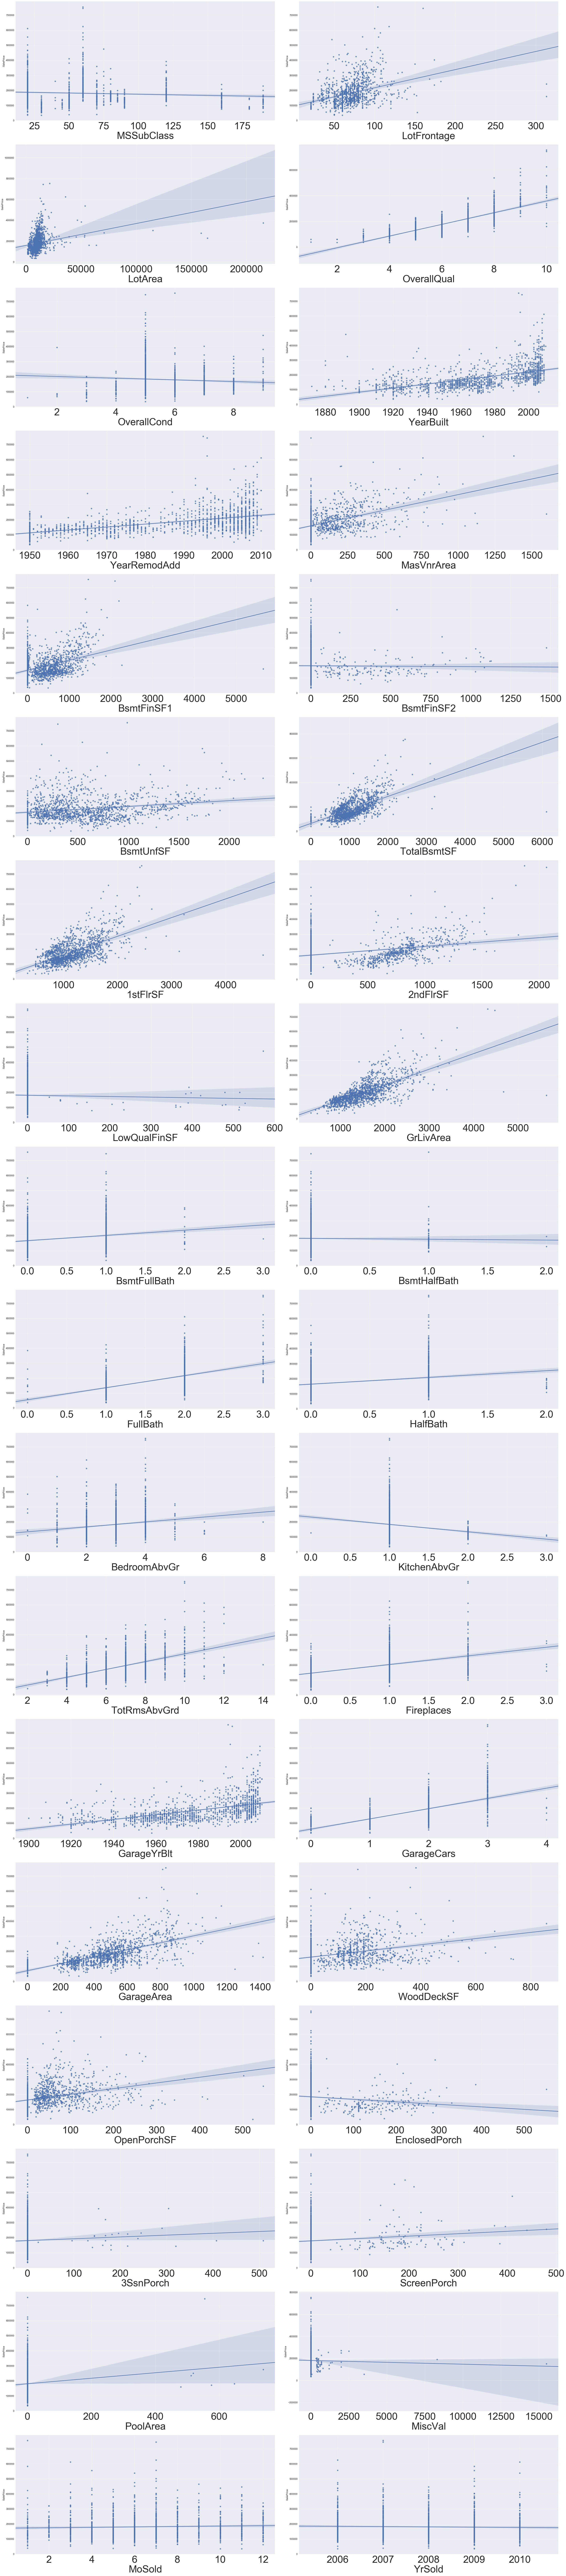

In [105]:
plt.figure(figsize=(40,200))
for i in range(len(list_num[1:-1])):
    plt.subplot(20, 2, i+1)
    ax = sns.regplot(x=list_num[1:-1][i], y="SalePrice", data=train)
    plt.tick_params(axis='x', labelsize=50)
    plt.tight_layout()
    ax.xaxis.label.set_size(50)

### Correlation plot

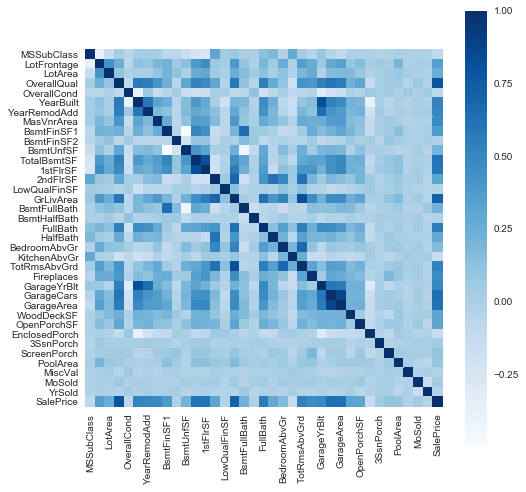

In [15]:
corr_num = train.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_num, vmax=1, square=True, cmap = "Blues")

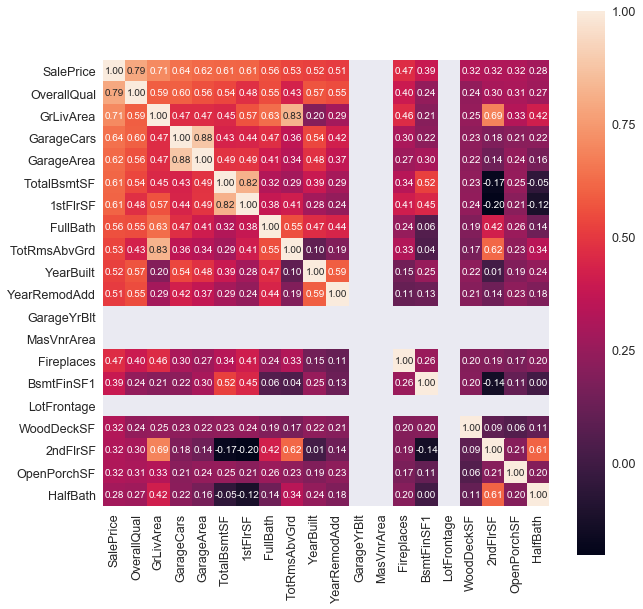

In [16]:
cols = corr_num.nlargest(20, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(10, 10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

In [81]:
# corr_obj = train.select_dtypes(exclude = ['float64', 'int64']).iloc[:, 1:].corr()
# plt.figure(figsize=(8, 8))
# sns.heatmap(corr_obj, vmax=1, square=True)

In [17]:
train_test = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

### Combine train and test dataset and impute missing data

In [18]:
count = train_test.isnull().sum().sort_values(ascending=False)
percent = (train_test.isnull().sum()/train_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([count, percent], axis=1, keys=['Count', 'Percent'])

In [19]:
missing_data.loc[missing_data.Count > 0, :]

,Count,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


In [89]:
# train_test.PoolQC = train_test.PoolQC.fillna("None")
# train_test.MiscFeature = train_test.MiscFeature.fillna("None")
# train_test.Alley = train_test.Alley.fillna("None")
# train_test.Fence = train_test.Fence.fillna("None")
# train_test.FireplaceQu = train_test.FireplaceQu.fillna("None")

In [20]:
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
            'MasVnrType'):
    train_test[col] = train_test[col].fillna('None')

In [21]:
for col in ('GarageArea', 'GarageCars', 'MasVnrArea', 
            'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train_test[col] = train_test[col].fillna(0)

In [22]:
pd.set_option('display.max_columns', None)
#train_test.Garage = [2007 if x ==2207 for x in garage, else x]
train_test.loc[train_test.GarageYrBlt == 2207, 'GarageYrBlt'] = 2007

In [23]:
train_test['RemodAdd'] = train_test.YearRemodAdd - train_test.YearBuilt
train_test.RemodAdd

0         0
1         0
2         1
3        55
4         0
5         2
6         1
7         0
8        19
9        11
10        0
11        1
12        0
13        1
14        0
15       72
16        0
17        0
18        0
19        7
20        1
21       20
22        0
23        0
24       33
25        0
26       49
27        1
28       40
29       23
30       30
31       40
32        0
33        0
34        0
35        1
36        1
37       36
38       54
39        0
40        0
41        0
42        0
43        5
44        0
45        0
46        0
47        0
48       88
49        0
50        0
51       16
52        0
53        6
54        0
55        0
56        1
57        0
58        0
59        0
60        0
61       76
62        0
63       29
64        1
65        1
66       19
67        0
68        5
69        0
70        0
71       24
72        0
73       49
74       35
75        0
76        0
77       53
78        0
79       71
80        0
81        0
82        0
83  

In [24]:
#train_test.loc[train_test['GarageCars'].isnull(), :]
train_test = train_test.reset_index()

In [25]:
train_test['GarageBlt'] = [0 if train_test.loc[i, 'GarageYrBlt'] == 'NaN'
                           else train_test.loc[i, 'GarageYrBlt'] - train_test.loc[i,'YearBuilt'] for i in range(len(train_test['GarageYrBlt']))]

### Saleprice change in months from 2006 to 2010

In [31]:
train_test['year'] = train_test['YrSold']

In [40]:
train_test['month'] = train_test['MoSold']
train_test['day'] = 1

(2919, 86)

In [39]:
train_test['date'] = pd.to_datetime(train_test[['year', 'month', 'day']])

In [41]:
ntrain = train.shape[0]
train = train_test[:ntrain]

In [45]:
y_train = train1.SalePrice

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [47]:
train = pd.concat([train, y_train], axis =1)

In [63]:
train_time = train.groupby('date')['SalePrice'].agg(['mean'])

In [64]:
train_time = train_time.reset_index()

In [65]:
train_time = train_time.rename(columns = {'mean':'SalePrice_mean'})

In [75]:
train_time['SalePrice_median'] = train.groupby('date')['SalePrice'].agg(['median']).reset_index()['median']

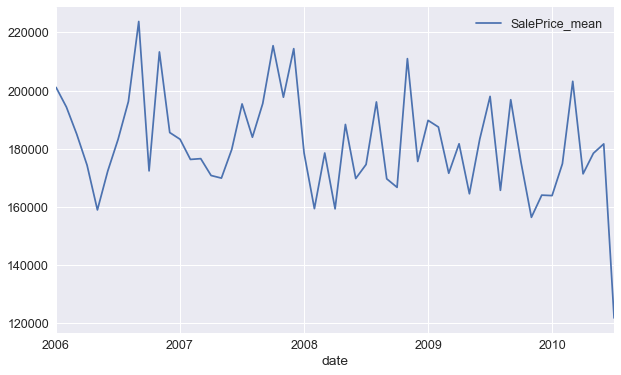

In [87]:
plt.figure(figsize = (50,50))
train_time.plot(x='date', y='SalePrice_mean', figsize=(10, 6))

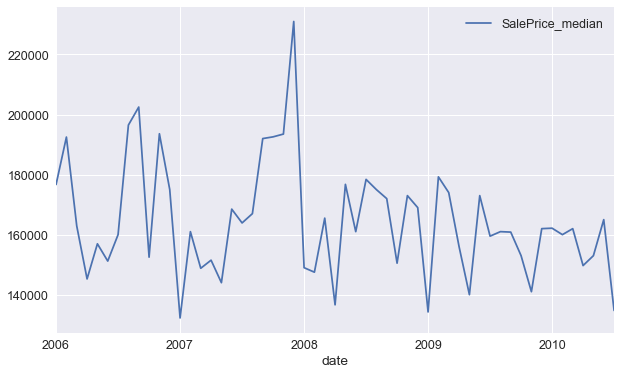

In [88]:
train_time.plot(x='date', y='SalePrice_median', figsize=(10, 6))

### Saleprice change in quarters from 2006 to 2010

In [89]:
train_time['Qtr'] = pd.PeriodIndex(pd.to_datetime(train_time.date), freq='Q')

In [90]:
train_time_qtr = train_time.groupby('Qtr')['SalePrice_median'].agg(['median']).reset_index()

In [97]:
train_time_qtr['mean'] = train_time.groupby('Qtr')['SalePrice_median'].agg(['mean']).reset_index()['mean']

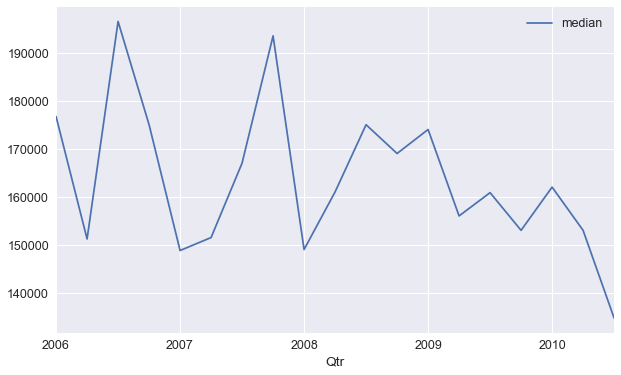

In [94]:
train_time_qtr.plot(x='Qtr', y='median', figsize=(10, 6))

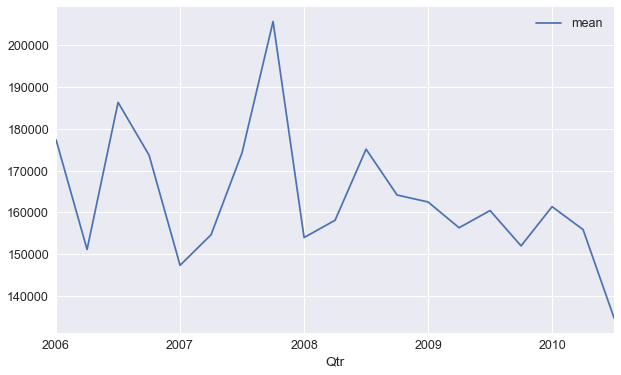

In [99]:
train_time_qtr.plot(x='Qtr', y='mean', figsize=(10, 6))

In [106]:
# from sklearn.feature_selection import VarianceThreshold

In [371]:
# sel = VarianceThreshold(threshold = 0.1)
# sel.fit_transform(train.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:])
# X_new = sel.transform(train.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:])

### Read Andrew's datasets

In [5]:
house_train_d = pd.read_csv('/Users/peter/Downloads/Machine_Learning/train_dummies.csv', header = 0, index_col=0)

In [6]:
house_test_d =pd.read_csv('/Users/peter/Downloads/Machine_Learning/test_dummies.csv', header = 0, index_col=0)

In [8]:
# Fixing some column names:
house_train_d.rename(index=str, columns={"Exterior1st_Wd Sdng": "Exterior1st_Wd_Sdng", 
                              "HouseStyle_1.5Fin": "HouseStyle_1_5Fin",
                             "HouseStyle_1.5Unf": "HouseStyle_1_5Unf",
                             "HouseStyle_2.5Fin": "HouseStyle_2_5Fin",
                             "HouseStyle_2.5Unf": "HouseStyle_2_5Unf",
                             "Exterior2nd_Brk Cmn": "Exterior2nd_Brk_Cmn",
                             "Exterior2nd_Wd Sdng":"Exterior2nd_Wd_Sdng",
                             "RoofMatl_Tar&Grv":"RoofMatl_Tar_Grv"}, inplace = True)
house_test_d.rename(index=str, columns={"Exterior1st_Wd Sdng": "Exterior1st_Wd_Sdng", 
                              "HouseStyle_1.5Fin": "HouseStyle_1_5Fin",
                             "HouseStyle_1.5Unf": "HouseStyle_1_5Unf",
                             "HouseStyle_2.5Fin": "HouseStyle_2_5Fin",
                             "HouseStyle_2.5Unf": "HouseStyle_2_5Unf",
                              "Exterior2nd_Brk Cmn": "Exterior2nd_Brk_Cmn",
                              "Exterior2nd_Wd Sdng":"Exterior2nd_Wd_Sdng",
                              "RoofMatl_Tar&Grv":"RoofMatl_Tar_Grv"}, inplace = True)
house_train_d.drop(["MSZoning_C (all)","Exterior2nd_Wd Shng"], axis=1, inplace = True)
house_test_d.drop(["MSZoning_C (all)","Exterior2nd_Wd Shng"], axis=1, inplace = True)

In [13]:
print(house_train_d.shape)
print(house_test_d.shape)

(1456, 266)
(1459, 265)


In [15]:
train = house_train_d.ix[:,0:265]
target = house_train_d.ix[:,265]

In [227]:
X = house_train_d.ix[:,0:265].values
y = house_train_d.ix[:,265].values

### Lasso

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
from sklearn.linear_model import LassoCV, RidgeCV, Lasso, Ridge

In [115]:
lasso_model = LassoCV(cv=10, n_alphas=500, normalize=True, random_state=0, max_iter=50000, tol = .0001)
lasso_fit = lasso_model.fit(train, target)

In [117]:
y_pred = lasso_fit.predict(X_test)
log_error = rmsle(y_test, y_pred)
print(log_error)

0.137748332754


In [114]:
def rmsle(y_true,y_pred):
   assert len(y_true) == len(y_pred)
   #return np.square(y_pred - y_true).mean() ** 0.5
   return np.square(np.log(y_pred + 1) - np.log(y_true + 1)).mean() ** 0.5

log_error = rmsle(y_test, y_pred)
print(log_error)

0.137748332754


In [105]:
regr = Lasso(alpha=.0005, max_iter=50000, tol = .0001)
regr.fit(train, target)

# Run prediction on training set to get a rough idea of how well it does.
y_pred = regr.predict(X_test)
log_error = rmsle(y_test, y_pred)
print(log_error)

0.120594391642


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score
import numpy as np

clf = RandomForestRegressor() #Initialize with whatever parameters you want to

# 10-Fold Cross validation
print(np.mean(cross_val_score(clf, X_train, y_train, cv=10)))

/Users/peter/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.872704532594


In [64]:
param_grid = {
                 'n_estimators': [40, 50,60, 70],
                 'max_depth': [10, 20, 30, 40]
             }

In [65]:
#param_grid

In [78]:
from sklearn.grid_search import GridSearchCV

grid_clf = GridSearchCV(clf, param_grid, cv=10, scoring="neg_mean_absolute_error")
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [40, 50, 60, 70], 'max_depth': [10, 20, 30, 40]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [119]:
ran = grid_clf.best_estimator_

In [120]:
ran.fit(X_train, y_train)
ran.score(X_train, y_train)

0.98353043999045087

In [135]:
ran_1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [ ]:
y_pred_1 = ran.predict(X_t)

In [123]:
y_pred_1 = ran.predict(X_train)
log_error_1 = rmsle(y_train, y_pred_1)
print(log_error_1)

0.0564823465027


In [127]:
y_pred = ran.predict(X_test)
log_error = rmsle(y_test, y_pred)
print(log_error)
print(log_error**2)

0.142321799566
0.0202554946318


### Use gridsearch CV not finished

In [82]:
regr = RandomForestRegressor(n_estimators=40, max_depth=10, random_state=0)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

log_error = rmsle(y_test, y_pred)
print(log_error)

0.138628095518


In [ ]:
parameters = {"max_depth": [2,3,4,5,6,7,8,9,10,11,12]
                        ,"min_samples_split" :[2,3,4,5,6]
                        ,"n_estimators" : [10]
                        ,"min_samples_leaf": [1,2,3,4,5]
                        ,"max_features": (2,3,4)}
rf_regr = RandomForestRegressor()
grid_clf1 = GridSearchCV(rf_regr, parameters, cv = 10)
grid_clf1.fit(X_train,y_train)
ran_best = grid_clf1.best_estimator_


In [132]:
ran_best = grid_clf1.best_estimator_

In [137]:
ran_best.fit(X_train, y_train)
ran_best.score(X_train, y_train)
y_pred_2 = ran_best.predict(X_test)
log_error_2 = rmsle(y_test, y_pred_2)
print(log_error_2)

0.175617198001


### Testing (ignore)

In [370]:
a= ran_best.feature_importances_

In [297]:
b = list(a)

In [298]:
c = list(enumerate(b))

In [357]:
c = sorted(c, key=lambda e: e[1], reverse=True)

In [163]:
#c_2 = list(filter(lambda x: x[1] > 1/265, c))

In [290]:
train_colnames = list(train)

In [291]:
train_colnames = list(enumerate(train_colnames))

In [176]:
# c_list = [lambda x: list(x) for x in c]

In [359]:
c_list = []
for i in range(len(c)):
    c_list.append(list(c[i]))

In [361]:
for i in range(len(train_colnames)):
        c_list[i][0] = train_colnames[i][1]

In [185]:
c_list_select = list(filter(lambda x: x[1] > 1/265, c_list))
len(c_list_select)

50

In [253]:
c_list_150 = c_list[0:150]

In [189]:
c_list_select_name = [x[0] for x in c_list_select]

In [190]:
train_50 = train[c_list_select_name]

In [256]:
c_list_select_150 = [x[0] for x in c_list_150]
train_150 = train[c_list_select_150]

In [258]:
X1 = train_150.values 

In [261]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2, random_state=42)

### Random forest

In [262]:
from sklearn.ensemble import RandomForestRegressor

regr1 = RandomForestRegressor(n_estimators=40, max_depth=10, random_state=0)
regr1.fit(X_train1, y_train1)

y_pred1 = regr1.predict(X_test1)

log_error1 = rmsle(y_test1, y_pred1)
print(log_error1)

0.13888595053


In [315]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=40, max_depth=10, random_state=0)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

log_error = rmsle(y_test, y_pred)
print(log_error)

0.139337393627


### Get important features from randomforest

In [333]:
a1 = list(regr.feature_importances_)
b1 = list(enumerate(a1))
#c1 = sorted(b1, key=lambda e: e[1], reverse=True)

In [341]:
c_list_ = []
for i in range(len(c)):
    c_list_.append(list(b1[i]))
c_list_

[[0, 0.015844223853784711],
 [1, 0.0037529125296815171],
 [2, 0.0001823522189052244],
 [3, 0.0075746119402971589],
 [4, 3.0409513521734036e-05],
 [5, 0.001289677008262475],
 [6, 0.00025052169308485581],
 [7, 0.00037678092885803379],
 [8, 0.0032508463770100512],
 [9, 0.029031449647026843],
 [10, 0.00043059772354806018],
 [11, 0.0017089191694880199],
 [12, 0.00021385510999751508],
 [13, 0.0013266175894646364],
 [14, 0.00022963611196696711],
 [15, 0.010306782627651665],
 [16, 0.0045284062349736452],
 [17, 0.0028389393066139026],
 [18, 0.00025227744543879628],
 [19, 0.00043074444230680603],
 [20, 0.0016581256469953363],
 [21, 0.00024045349851399344],
 [22, 0.0031713961017300696],
 [23, 0.001339093006741506],
 [24, 0.00086637988468240071],
 [25, 0.00057355147049897035],
 [26, 0.025923997385059117],
 [27, 0.0044602321416613707],
 [28, 0.00039117668650460075],
 [29, 0.0035535035575548859],
 [30, 0.00022937368180001795],
 [31, 0.0034638991763238682],
 [32, 0.022783650823528286],
 [33, 0.001519

In [342]:
for i in range(len(train_colnames)):
        c_list_[i][0] = train_colnames[i][1]

In [343]:
c_list_
from operator import itemgetter
c_list_.sort(key=itemgetter(1), reverse = True)

### Ridge regression

In [308]:
from sklearn.kernel_ridge import KernelRidge

KRR1 = KernelRidge(alpha=1000000, kernel='polynomial', degree=2, coef0=2.5)
KRR1.fit(X_train1,y_train1)

y_pred1 = KRR1.predict(X_test1)

log_error1 = rmsle(y_test, y_pred1)
print(log_error1)

0.133032147113


In [264]:
from sklearn.kernel_ridge import KernelRidge

KRR = KernelRidge(alpha=1000000, kernel='polynomial', degree=2, coef0=2.5)
KRR.fit(X_train,y_train)

y_pred = KRR.predict(X_test)
y_pred_krr = y_pred

log_error = rmsle(y_test, y_pred)
print(log_error)

0.133032147113


### Number of features effect on rmsle: no effect, full features get the lowest score

In [369]:
dic_ = {}
for i in range(50, 266):
    c_list_n = c_list_[0:i]
    #print(c_list_n)
    c_list_test = [x[0] for x in c_list_n]
    #print(c_list_test)
    train_test = train[c_list_test]
    X1 = train_test.values
    #print(X1.shape)
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2, random_state=42)
    from sklearn.kernel_ridge import KernelRidge

    KRR1 = KernelRidge(alpha=1000000, kernel='polynomial', degree=2, coef0=2.5)
    KRR1.fit(X_train1,y_train1)

    y_pred1 = KRR1.predict(X_test1)

    log_error1 = rmsle(y_test, y_pred1)
    dic_[i] = log_error1

In [366]:
import operator
sorted(dic_.items(), key=operator.itemgetter(1))

[(265, 0.13303214711265232),
 (264, 0.13303760136761161),
 (263, 0.13304317281190936),
 (262, 0.13304890474584624),
 (261, 0.13305471367058874),
 (260, 0.13306095079522245),
 (259, 0.13306760849310717),
 (258, 0.13307368886748505),
 (257, 0.13308051099489646),
 (256, 0.13308765549601642),
 (255, 0.13309620905502553),
 (254, 0.13310382898112164),
 (252, 0.13310585086485535),
 (253, 0.13310757440592588),
 (251, 0.13311420518102168),
 (250, 0.13312265218969141),
 (249, 0.13313150321105549),
 (248, 0.13314045831363161),
 (247, 0.13314437321169176),
 (245, 0.13314604697863891),
 (246, 0.13315560164416537),
 (244, 0.13317386444439674),
 (243, 0.13318444232137649),
 (242, 0.13319710587419228),
 (241, 0.13321054492216344),
 (240, 0.13322594426325529),
 (238, 0.13323907206464189),
 (239, 0.13324289746517942),
 (237, 0.13331981553557071),
 (236, 0.13333272134211036),
 (235, 0.13334621957955373),
 (234, 0.13336044285494611),
 (233, 0.13337625939978506),
 (232, 0.13338705953694724),
 (231, 0.13340